In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

### Download assets

In [6]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")

    # Download zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
        

In [7]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "assets/opencv_bootcamp_assets_NB1.zip")

if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

### Displaying images

In [9]:
Image(filename='assets/checkerboard_18x18.png')

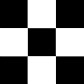

In [10]:
Image(filename='assets/checkerboard_84x84.jpg')

### Reading Images w/ OpenCV

In [12]:
cb_image = cv2.imread('assets/checkerboard_18x18.png', 0)
print(cb_image)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### Displaying image attributes

In [14]:
print(f'image size (h, w) is {cb_image.shape}')
print(f'image (data) type is {cb_image.dtype}')

image size (h, w) is (18, 18)
image (data) type is uint8


### Displaying images w/ Matplotlib

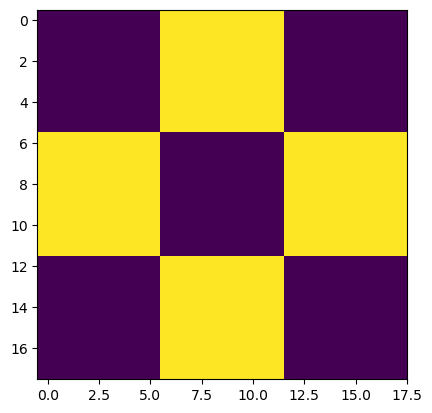

In [15]:
plt.imshow(cb_image)

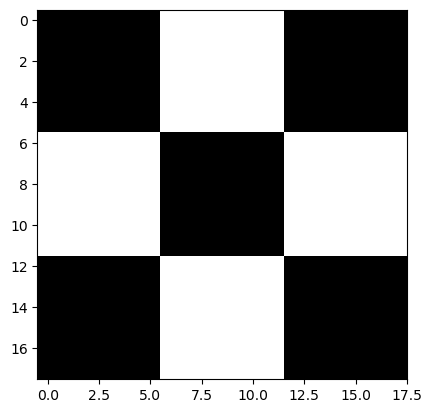

In [16]:
plt.imshow(cb_image, cmap='gray')

### Another example

In [18]:
Image(filename='assets/checkerboard_fuzzy_18x18.jpg')

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

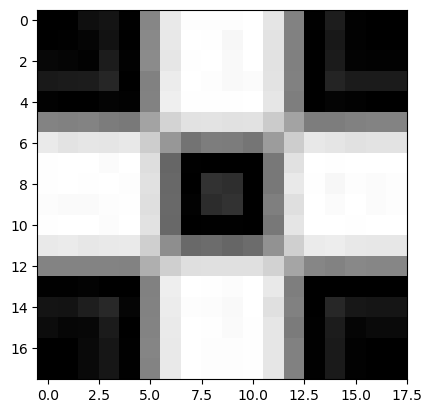

In [20]:
cb_img_fuzzy = cv2.imread('assets/checkerboard_fuzzy_18x18.jpg', 0)
plt.imshow(cb_img_fuzzy, cmap='gray')
print(cb_img_fuzzy)

### Colour images

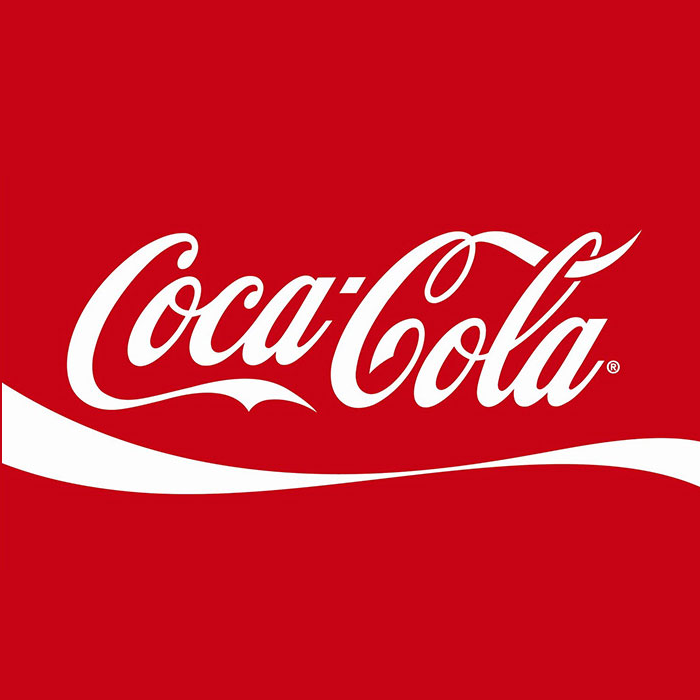

In [21]:
Image(filename='assets/coca-cola-logo.png')

In [26]:
coke_img = cv2.imread("assets/coca-cola-logo.png", 1)
print(f'image size (h, w, c) is {coke_img.shape}')
print(f'data type of image is {coke_img.dtype}')

image size (h, w, c) is (700, 700, 3)
data type of image is uint8


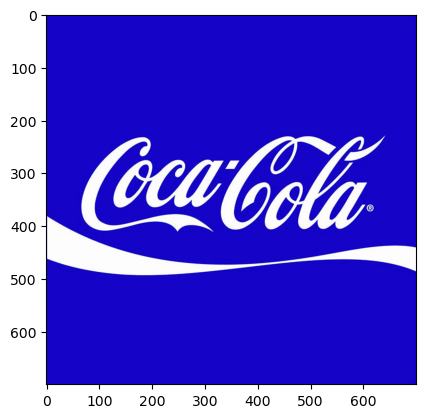

In [27]:
plt.imshow(coke_img)

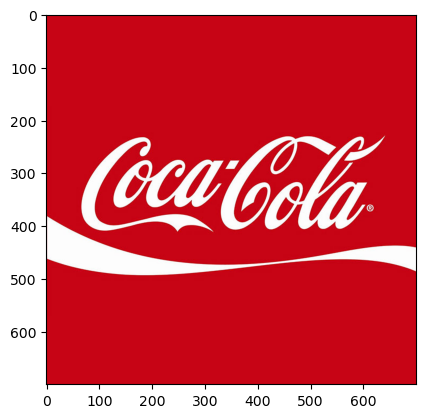

In [28]:
coke_img_reversed_channels = coke_img[:,:,::-1]
plt.imshow(coke_img_reversed_channels)

### Splitting, merging color channels

Text(0.5, 1.0, 'Merged output')

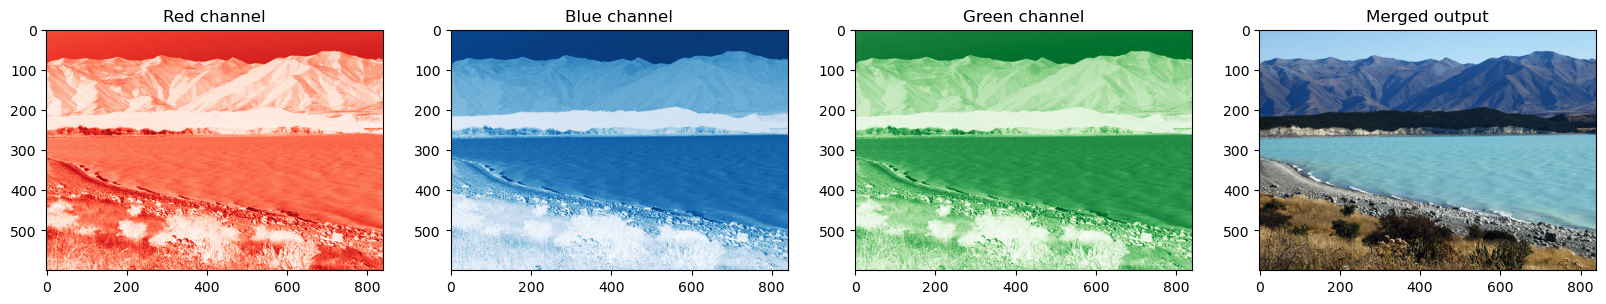

In [37]:
# splitting imgs into b,g,r components
img_NZ_bgr = cv2.imread('assets/New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="Reds"); plt.title("Red channel")
plt.subplot(142);plt.imshow(b, cmap="Blues"); plt.title("Blue channel")
plt.subplot(143);plt.imshow(g, cmap="Greens"); plt.title("Green channel")

# merge individual channels into single image
imgMerged = cv2.merge((b, g ,r))
plt.subplot(144); plt.imshow(imgMerged[:, :, ::-1]); plt.title('Merged output')



### Converting to different color spaces

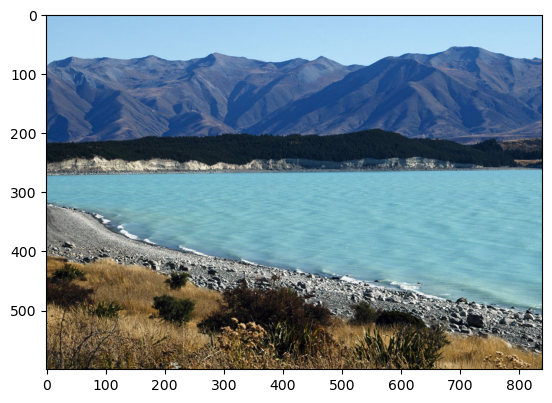

In [38]:
img_NZ_rbg = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rbg)

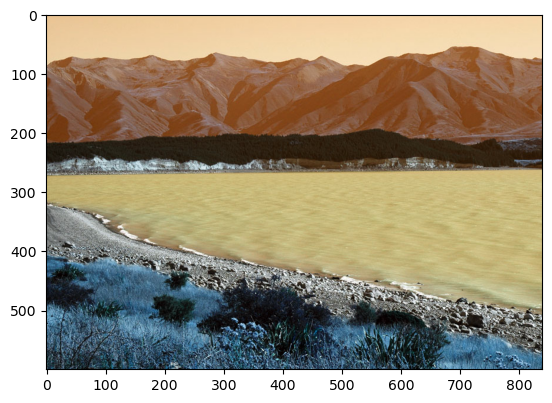

In [44]:
plt.imshow(img_NZ_bgr)


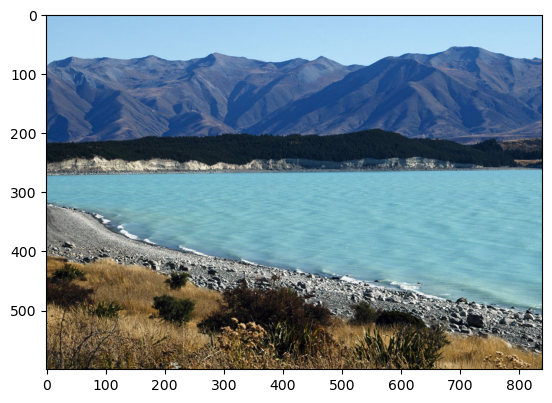

In [45]:
# below is similar to cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_bgr[:,:,::-1])

### Changing to HSV color space

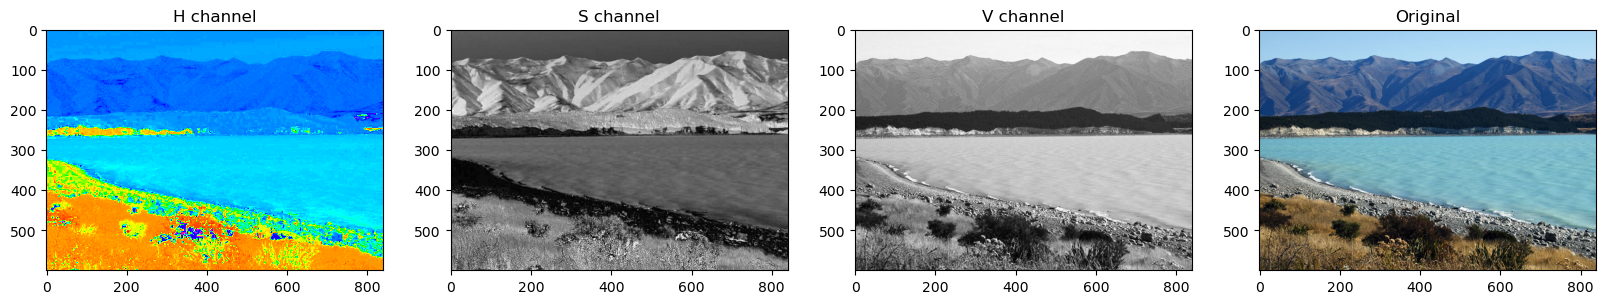

In [54]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# split img into b,g,r components
h,s,v = cv2.split(img_hsv)

# visualise channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap='hsv');plt.title('H channel');
plt.subplot(142);plt.imshow(s, cmap='gray');plt.title('S channel');
plt.subplot(143);plt.imshow(v, cmap='gray');plt.title('V channel');
plt.subplot(144);plt.imshow(img_NZ_rbg);plt.title('Original');

### Modifying individual channels

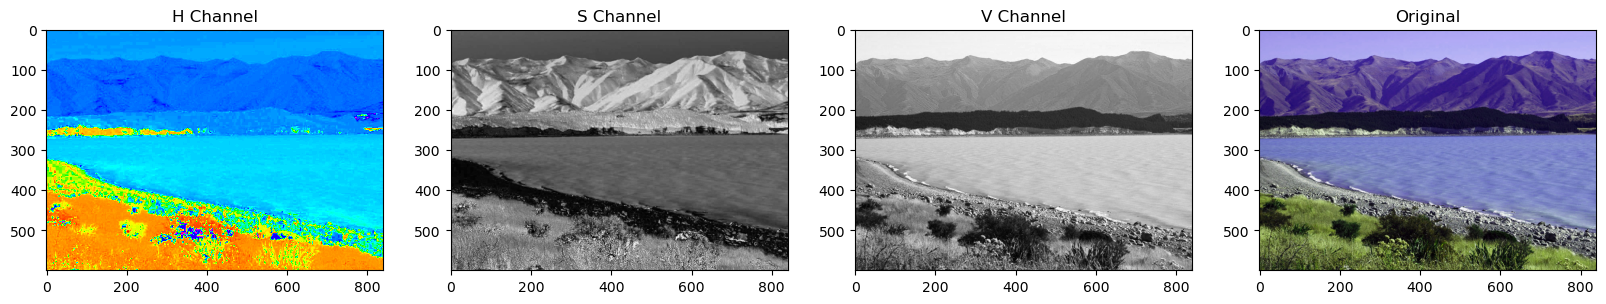

In [55]:
h_new = h + 20
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h_new, cmap="hsv");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

### Saving images

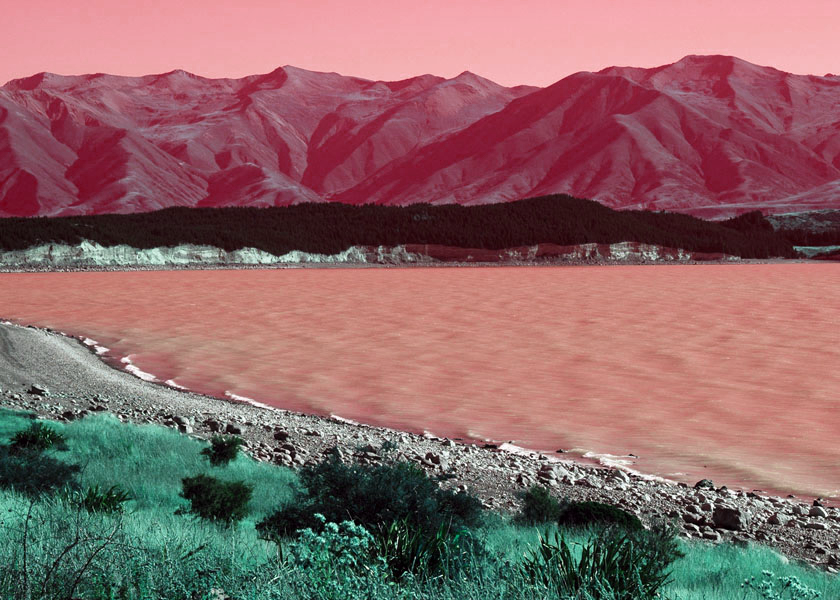

In [56]:
cv2.imwrite('assets/nz_lake_hplus20_saved.png', img_NZ_rgb)
Image(filename='assets/nz_lake_hplus20_saved.png')